# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [254]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy
%matplotlib inline

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [14]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [15]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [110]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [47]:
# load json as string
json_list= json.load((open('data/world_bank_projects_less.json')))
json_list

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [179]:
#json_normalize(json_list, 'majorsector_percent', 
#               ['approvalfy', 'board_approval_month', 'boardapprovaldate',
#               'borrower', 'country_namecode','countrycode','countryname',
#               'countryshortname','docty','envassesmentcategorycode',
#               'grantamt','ibrdcommamt','id','idacommamt','impagency',
#               'lendinginstr','lendinginstrtype','lendprojectcost',
#               'mjsector_namecode','mjtheme', 'mjthemecode', 'prodline',
#               'prodlinetext', 'productlinetype'],
#              )
namecode= json_normalize(json_list, 'mjsector_namecode')
namecode

,code,name
0,EX,Education
1,EX,Education
2,BX,"Public Administration, Law, and Justice"
3,EX,Education
4,BX,"Public Administration, Law, and Justice"
5,BX,"Public Administration, Law, and Justice"


In [214]:
percent= json_normalize(json_list, 'majorsector_percent', ['countrycode'])
percent
## This percentage is the same as the values in columns section1,2,3,4.

,Name,Percent,countrycode
0,Education,46,ET
1,Education,26,ET
2,"Public Administration, Law, and Justice",16,ET
3,Education,12,ET
4,"Public Administration, Law, and Justice",70,TN
5,"Public Administration, Law, and Justice",30,TN


In [222]:
json_normalize(json_list,'mjtheme_namecode', ['countrycode'])

,code,name,countrycode
0,8,Human development,ET
1,11,,ET
2,1,Economic management,TN
3,6,Social protection and risk management,TN


In [188]:
#json_normalize(json_list,'projectdocs')

In [215]:
json_normalize(json_list,'sector', ['countrycode'])

,Name,countrycode
0,Primary education,ET
1,Secondary education,ET
2,Public administration- Other social services,ET
3,Tertiary education,ET
4,Public administration- Other social services,TN
5,General public administration sector,TN


In [190]:
#json_normalize(json_list, 'sector_namecode')

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [146]:
json_list1= json.load((open('data/world_bank_projects.json')))
json_list1

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [217]:
# Number of countries in the file
sample_json_df1 = pd.read_json('data/world_bank_projects.json')
len(sample_json_df1)

500

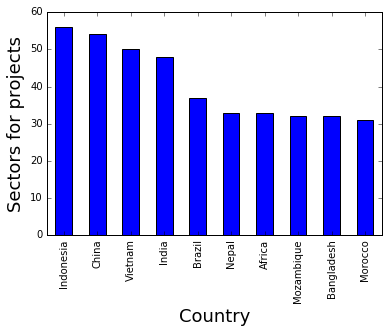

In [288]:
## 1. Find the 10 countries with most projects
## Answer: I count the number of sectors where each country has proposed projects.
projects= json_normalize(json_list1, 'sector', 
                         ['countryshortname'] )
df= pd.DataFrame( projects.groupby('countryshortname').Name.count()).reset_index()
df1= df.sort_values(by='Name', ascending= False).head(10)
ax= df1.plot(kind='bar', x='countryshortname', y='Name', legend= False )
ax.set_xlabel('Country', fontsize= 18)
ax.set_ylabel('Sectors for projects', fontsize= 18)

In [238]:
## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
# Ans: For this, I will count the most popular project themes
themes= json_normalize(json_list1,'mjtheme_namecode', ['countrycode'])
most_popular_themes= themes.name.value_counts().head(11)
most_popular_themes
# Since there are missed values, these data is not entirely correct.

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64

In [286]:
# 3. above you notice that some entries have only 
#the code and the name is missing. 
#Create a dataframe with the missing names filled in.
themes_organized= pd.DataFrame(themes.sort_values(by= 'code')).reset_index()
themes_organized= themes_organized.drop(['index'], axis=1)
themes_organized= themes_organized.replace('', numpy.nan, regex=True)
themes_organized= themes_organized.fillna(method= 'pad')
themes_organized.head()

,code,name,countrycode
0,1,Economic management,ST
1,1,Economic management,UY
2,1,Economic management,CO
3,1,Economic management,CO
4,1,Economic management,TO


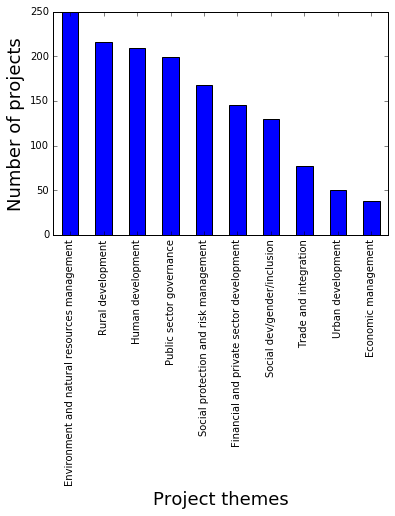

In [287]:
most_popular_themes1= themes_organized.name.value_counts().head(10)
ax= most_popular_themes1.plot(kind= 'bar')
ax.set_xlabel('Project themes', fontsize=18)
ax.set_ylabel('Number of projects', fontsize= 18)